In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [2]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_GLD.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

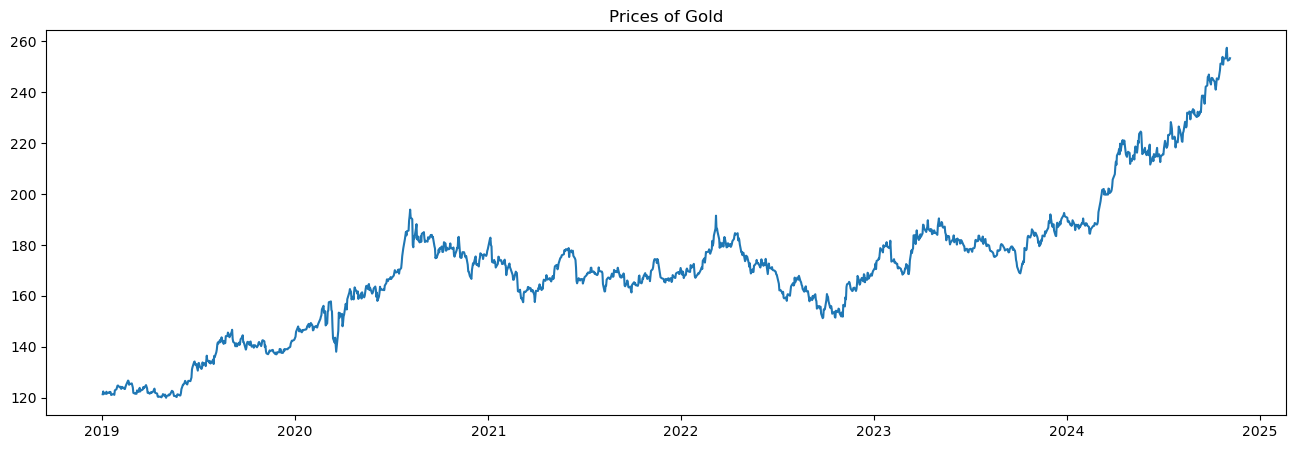

In [4]:
# Format column Date
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis=1, inplace=True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16, 5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [5]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [6]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [7]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [8]:
# Build the model
model = Sequential()

# Add a GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add another GRU layer with 50 units and return_sequences set to True
model.add(GRU(50, return_sequences=True))

# Add a final GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the model with the correct '.keras' extension
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the best model during training
best_model = ModelCheckpoint(
    filepath=save_model,
    monitor='loss',
    verbose=2,
    save_best_only=True,
    mode='auto'
)

# Train the model using the 'fit' method
model.fit(
    x_train,
    y_train,
    epochs=80,
    batch_size=50,
    verbose=2,
    callbacks=[best_model]
)

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08481, saving model to save_model_7_2_1.keras
21/21 - 4s - 196ms/step - loss: 0.0848
Epoch 2/80

Epoch 2: loss improved from 0.08481 to 0.02516, saving model to save_model_7_2_1.keras
21/21 - 0s - 7ms/step - loss: 0.0252
Epoch 3/80

Epoch 3: loss improved from 0.02516 to 0.01594, saving model to save_model_7_2_1.keras
21/21 - 0s - 7ms/step - loss: 0.0159
Epoch 4/80

Epoch 4: loss improved from 0.01594 to 0.01394, saving model to save_model_7_2_1.keras
21/21 - 0s - 6ms/step - loss: 0.0139
Epoch 5/80

Epoch 5: loss improved from 0.01394 to 0.01364, saving model to save_model_7_2_1.keras
21/21 - 0s - 7ms/step - loss: 0.0136
Epoch 6/80

Epoch 6: loss improved from 0.01364 to 0.01362, saving model to save_model_7_2_1.keras
21/21 - 0s - 6ms/step - loss: 0.0136
Epoch 7/80

Epoch 7: loss improved from 0.01362 to 0.01342, saving model to save_model_7_2_1.keras
21/21 - 0s - 7ms/step - loss: 0.0134
Epoch 8/80

Epoch 8: loss improved from 0.01342 to 0.01335, s

In [9]:
# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 


In [10]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [11]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [12]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)
     

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [13]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9999999999999999, 0.9709944346495104, 0.9634341459162689, 0.9660511901608232, 0.9701947792124707]


In [14]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9338113069534302], [0.8854159116744995], [0.8458782434463501], [0.8155477046966553], [0.7899394035339355], [0.7656366229057312], [0.741685152053833], [0.7185824513435364], [0.6968244314193726], [0.6764808297157288], [0.6573832035064697], [0.639349102973938], [0.6222647428512573], [0.6060662865638733], [0.5907045602798462], [0.5761288404464722], [0.5622872710227966], [0.549130380153656], [0.5366135239601135], [0.5246965885162354], [0.5133428573608398], [0.5025184154510498], [0.4921920597553253], [0.4823344945907593], [0.47291892766952515], [0.463920533657074], [0.4553159773349762], [0.44708362221717834], [0.4392034113407135], [0.43165674805641174]]


In [15]:
# Convert the 'Date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string '%Y-%m-%d'
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 30 days
datelist_future = pd.date_range(datelist_train[-1] + dt.timedelta(days=1), periods=30, freq='1d').tolist()

In [16]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[248.39508354]
 [241.73781308]
 [236.29901154]
 [232.1267427 ]
 [228.60406485]
 [225.26097441]
 [221.96621014]
 [218.78820268]
 [215.79516951]
 [212.99670371]
 [210.3696343 ]
 [207.88886347]
 [205.53873893]
 [203.31047933]
 [201.19732029]
 [199.19228431]
 [197.28823805]
 [195.47837618]
 [193.75655747]
 [192.11726386]
 [190.55544463]
 [189.06643442]
 [187.64594096]
 [186.28993432]
 [184.99472896]
 [183.7569099 ]
 [182.57326715]
 [181.4408244 ]
 [180.35682261]
 [179.31870363]]


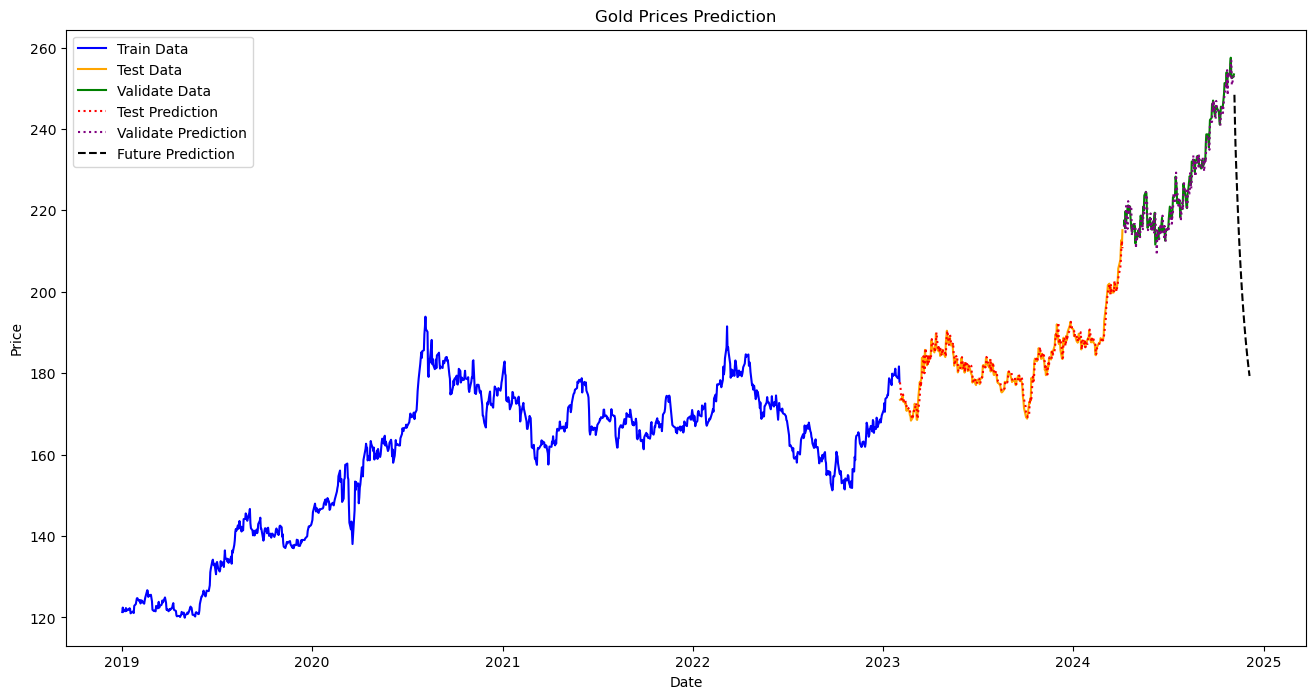

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [18]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.1357716670539701
MAPE:  0.6168597489692215
RMSE:  1.5027356961779181

** Validate **
MAE:  1.8967587247400235
MAPE:  0.8391784817416998
RMSE:  2.3856550142591426


# Split dataset (6-3-1)

---



In [37]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [38]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [39]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [40]:
# Set the filename to use for saving the model with the correct .keras extension
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80

Epoch 1: loss improved from inf to 0.00850, saving model to save_model_6_3_1.keras
18/18 - 0s - 7ms/step - loss: 0.0085
Epoch 2/80

Epoch 2: loss did not improve from 0.00850
18/18 - 0s - 5ms/step - loss: 0.0086
Epoch 3/80

Epoch 3: loss did not improve from 0.00850
18/18 - 0s - 5ms/step - loss: 0.0087
Epoch 4/80

Epoch 4: loss improved from 0.00850 to 0.00839, saving model to save_model_6_3_1.keras
18/18 - 0s - 8ms/step - loss: 0.0084
Epoch 5/80

Epoch 5: loss did not improve from 0.00839
18/18 - 0s - 5ms/step - loss: 0.0094
Epoch 6/80

Epoch 6: loss did not improve from 0.00839
18/18 - 0s - 5ms/step - loss: 0.0105
Epoch 7/80

Epoch 7: loss did not improve from 0.00839
18/18 - 0s - 5ms/step - loss: 0.0087
Epoch 8/80

Epoch 8: loss did not improve from 0.00839
18/18 - 0s - 5ms/step - loss: 0.0084
Epoch 9/80

Epoch 9: loss improved from 0.00839 to 0.00828, saving model to save_model_6_3_1.keras
18/18 - 0s - 7ms/step - loss: 0.0083
Epoch 10/80

Epoch 10: loss did not improve 

In [41]:
# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [42]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [43]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [44]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [45]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9999999999999999, 0.9709944346495104, 0.9634341459162689, 0.9660511901608232, 0.9701947792124707]


In [46]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9569326639175415], [0.9447451233863831], [0.9349532127380371], [0.9251357913017273], [0.9167847633361816], [0.9091463685035706], [0.9018683433532715], [0.8951619863510132], [0.8889036774635315], [0.8830540776252747], [0.8776115775108337], [0.872528076171875], [0.8677765727043152], [0.8633348345756531], [0.8591771125793457], [0.8552829027175903], [0.851633608341217], [0.8482112288475037], [0.845000147819519], [0.8419855833053589], [0.8391538262367249], [0.8364928960800171], [0.8339911699295044], [0.8316381573677063], [0.8294240832328796], [0.8273399472236633], [0.8253774642944336], [0.8235291242599487], [0.8217874765396118], [0.8201461434364319]]


In [47]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [48]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[251.57565735]
 [249.89913931]
 [248.5521641 ]
 [247.20167963]
 [246.05291224]
 [245.00217467]
 [244.00100955]
 [243.07848309]
 [242.21759014]
 [241.4129192 ]
 [240.6642489 ]
 [239.96496246]
 [239.31134566]
 [238.70034017]
 [238.12840394]
 [237.59271645]
 [237.09071952]
 [236.619937  ]
 [236.17822071]
 [235.76353722]
 [235.37400072]
 [235.00796318]
 [234.66382573]
 [234.34014533]
 [234.0355773 ]
 [233.74888355]
 [233.47892441]
 [233.22466676]
 [232.9850857 ]
 [232.75930392]]


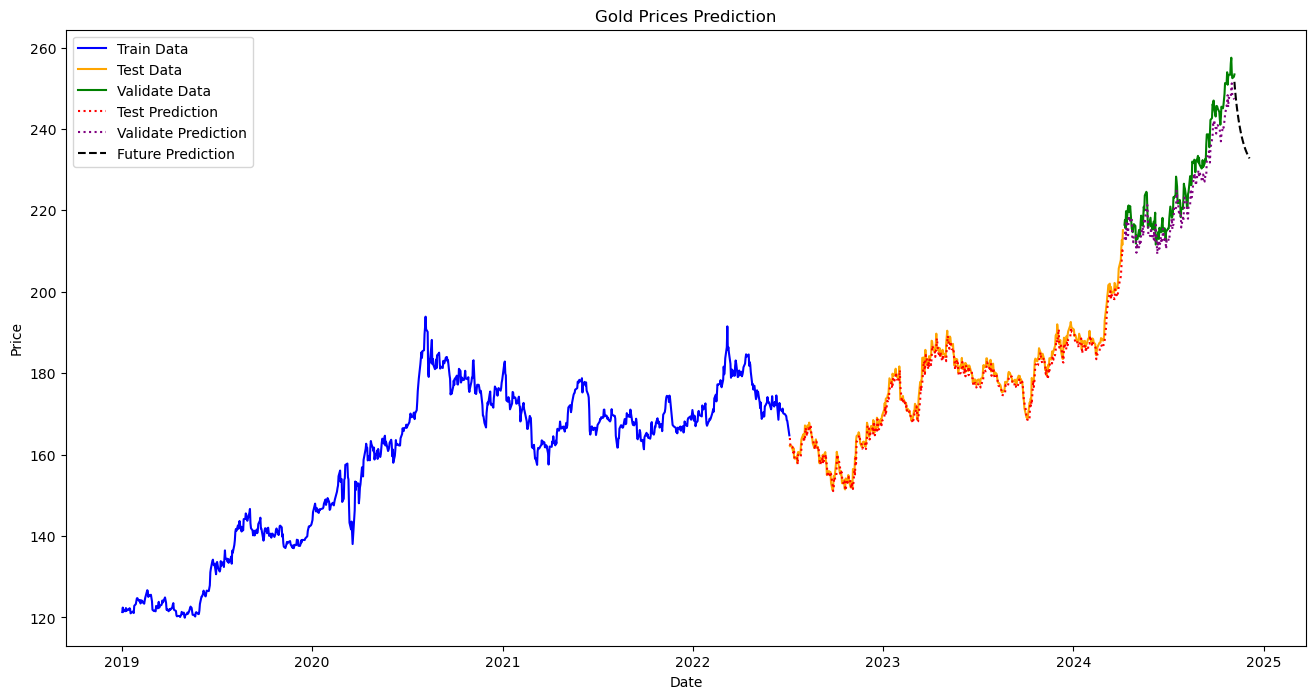

In [49]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [36]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3840121650089465
MAPE:  0.7749731869515065
RMSE:  1.7959790293574445

** Validate **
MAE:  3.766775906620831
MAPE:  1.6345320519804405
RMSE:  4.295918667151825


# Split dataset (5-3-2)

---



In [50]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [51]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [52]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [53]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10725, saving model to save_model_5_3_2.keras
15/15 - 4s - 278ms/step - loss: 0.1073
Epoch 2/80

Epoch 2: loss improved from 0.10725 to 0.04439, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0444
Epoch 3/80

Epoch 3: loss improved from 0.04439 to 0.01771, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0177
Epoch 4/80

Epoch 4: loss improved from 0.01771 to 0.01456, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0146
Epoch 5/80

Epoch 5: loss improved from 0.01456 to 0.01407, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0141
Epoch 6/80

Epoch 6: loss improved from 0.01407 to 0.01331, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0133
Epoch 7/80

Epoch 7: loss improved from 0.01331 to 0.01330, saving model to save_model_5_3_2.keras
15/15 - 0s - 8ms/step - loss: 0.0133
Epoch 8/80

Epoch 8: loss did not improve from 0.01330
15/15 

In [54]:
# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [55]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [56]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [57]:
# Dự báo dữ liệu test, val
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [58]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.9999999999999999, 0.9709944346495104, 0.9634341459162689, 0.9660511901608232, 0.9701947792124707]


In [61]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.680941104888916], [0.674724280834198], [0.6686173677444458], [0.6626171469688416], [0.6567205190658569], [0.6509243845939636], [0.645226001739502], [0.6396228075027466], [0.6341122388839722], [0.6286917328834534], [0.6233590841293335], [0.6181118488311768], [0.6129481196403503], [0.6078658699989319], [0.6028631329536438], [0.5979382991790771], [0.5930894017219543], [0.5883146524429321], [0.5836125612258911], [0.5789816975593567], [0.5744203329086304], [0.5699271559715271], [0.5655008554458618], [0.5611401796340942], [0.556843638420105], [0.5526100993156433], [0.5484381914138794], [0.5443267822265625], [0.5402748584747314], [0.536281406879425]]


In [62]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [63]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[213.61025915]
 [212.75507285]
 [211.9150059 ]
 [211.08961555]
 [210.27847543]
 [209.48115918]
 [208.69728965]
 [207.92651426]
 [207.16848046]
 [206.42283567]
 [205.68927652]
 [204.96746684]
 [204.25714427]
 [203.55803002]
 [202.86985352]
 [202.1923934 ]
 [201.52537908]
 [200.86856458]
 [200.22174492]
 [199.58472333]
 [198.95726202]
 [198.33918061]
 [197.73029872]
 [197.13044416]
 [196.53941196]
 [195.95704634]
 [195.38315869]
 [194.81759326]
 [194.26021064]
 [193.71087144]]


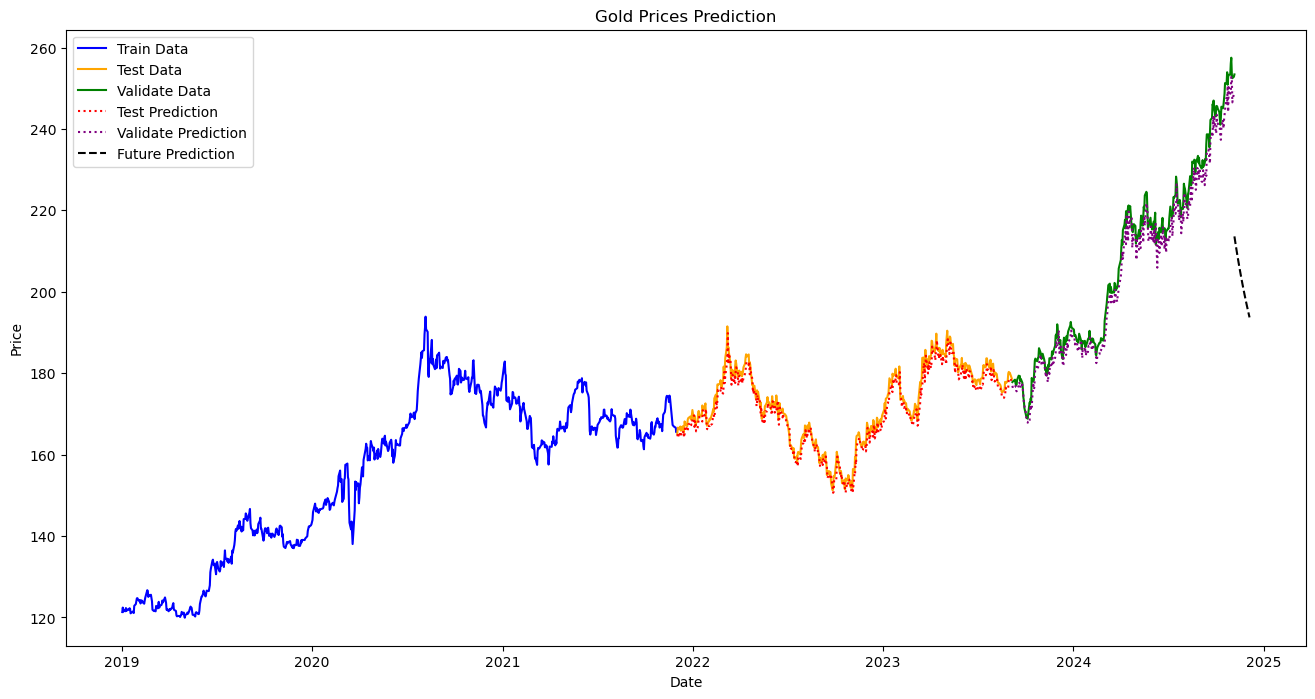

In [64]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [44]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.1858496627400443
MAPE:  0.687541616398146
RMSE:  1.5569264756420662

** Validate **
MAE:  1.7783962969895395
MAPE:  0.8326386980815522
RMSE:  2.348252703233777
